In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load the csv file
df = pd.read_csv('economy.csv')
index = pd.read_csv('index.csv')
df_deaths = pd.read_csv('deaths-from-hiv-by-age.csv')

In [6]:
#select the country
country = []
for name in range(0,len(df['location_key'])):
    if '_' not in str(df['location_key'][name]):
        country.append(name)
df = df.loc[country]

In [7]:
#distinguish between developed and developing countries
df['developed_country'] = df['gdp_per_capita_usd'].apply(lambda x:'Yes' if x > 20000 else 'No')
df = df[['location_key','gdp_per_capita_usd','developed_country']]
index = index[['location_key','iso_3166_1_alpha_3']]
df = pd.merge(index,df)
df = df.rename(columns={'iso_3166_1_alpha_3':'Code'})[['Code','developed_country']]

In [8]:
# load the csv file
df1 = pd.read_csv('hiv-death-rates-by-age.csv')

In [93]:
# load the csv file
df1 = pd.read_csv('hiv-death-rates-by-age.csv')

#choose three random developing and developed countries
df2 = pd.merge(df,df1).groupby('Code').get_group('USA')
df3 = pd.merge(df,df1).groupby('Code').get_group('CHN')
df4 = pd.merge(df,df1).groupby('Code').get_group('AUS')
df5 = pd.merge(df,df1).groupby('Code').get_group('IND')
df6 = pd.merge(df,df1).groupby('Code').get_group('JPN')
df7 = pd.merge(df,df1).groupby('Code').get_group('BRA')

sns.boxplot(data = pd.concat([df2,df6,df4,df5,df6,df7]), x = 'Code', y = 'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Rate)' )

#save the plot
plt.savefig('HIV death rate',dpi = 400,bbox_inches = 'tight',facecolor='white')

Text(0.5, 1.0, 'Death rate between three developed and developing countries')

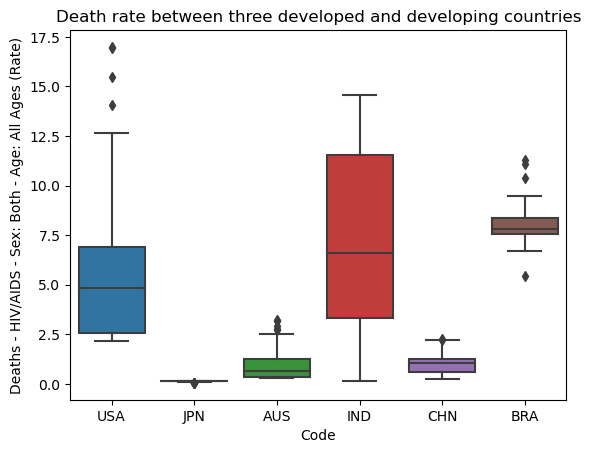

In [107]:
sns.boxplot(data = pd.concat([df2,df6,df4,df5,df3,df7]), x = 'Code', y = 'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Rate)' )
ax = plt.gca()
ax.set_title('Death rate between three developed and developing countries')
plt.savefig('HIV death rate',dpi = 400,bbox_inches = 'tight',facecolor='white')

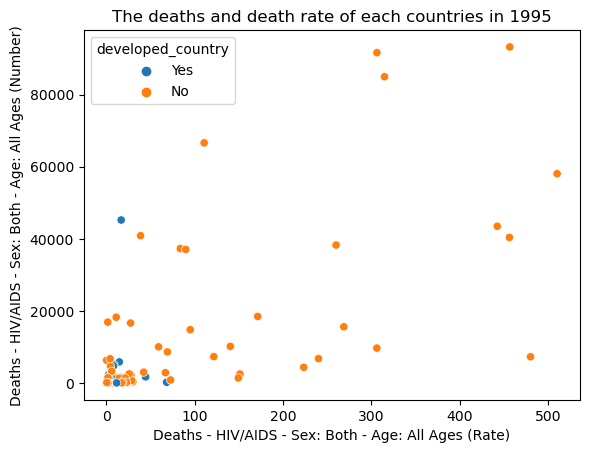

In [69]:
sns.scatterplot(data = pd.merge(pd.merge(df,df1),df_deaths).groupby('Year').get_group(1995), x = 'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Rate)', y = 'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)', 
                hue = 'developed_country')
ax = plt.gca()
ax.set_title('The deaths and death rate of each countries in 1995')
plt.savefig('The deaths and death rate of each countries in 1995',dpi = 400,bbox_inches = 'tight',facecolor='white')